In [ ]:
import pandas as pd
!pip install sentence-transformers
from sentence_transformers import SentenceTransformer
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.7/224.7 kB 4.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


## read dataset

In [ ]:
df = pd.read_csv('/content/implicit_hate_v1_stg2_posts.tsv', sep='\t')
df.head(3)

,post,implicit_class,extra_implicit_class
0,""" : jewish harvard professor noel ignatiev w...",white_grievance,NaN
1,rt : tune in today's jmt for my interview w /...,irony,NaN
2,: : hate posters ? you want hate buddy ? read ...,white_grievance,NaN


In [ ]:
print(df['implicit_class'].value_counts(), "\n")
df = df[df['implicit_class'] != 'other']
print(df['implicit_class'].value_counts())

X = df['post']
y = df['implicit_class']
classes = list(df['implicit_class'].unique())

implicit_class
white_grievance    1538
incitement         1269
stereotypical      1133
inferiority         863
irony               797
threatening         666
other                80
Name: count, dtype: int64 

implicit_class
white_grievance    1538
incitement         1269
stereotypical      1133
inferiority         863
irony               797
threatening         666
Name: count, dtype: int64


## Subtype Classification (baseline)

In [ ]:
# Load pre-trained BERT model
model_name = 'bert-base-nli-mean-tokens'
model = SentenceTransformer(model_name)

# Encode text using pre-trained BERT model
encoded_text = model.encode(X.tolist())

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.99k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/399 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(encoded_text, y, test_size=0.2, random_state=42)

Accuracy: 0.5167464114832536 

                 precision    recall  f1-score   support

white_grievance       0.51      0.49      0.50       265
          irony       0.43      0.52      0.47       165
  stereotypical       0.50      0.57      0.53       165
     incitement       0.54      0.55      0.54       241
    threatening       0.47      0.55      0.51       117
    inferiority       0.62      0.48      0.54       301

       accuracy                           0.52      1254
      macro avg       0.51      0.52      0.51      1254
   weighted avg       0.53      0.52      0.52      1254



<Axes: >

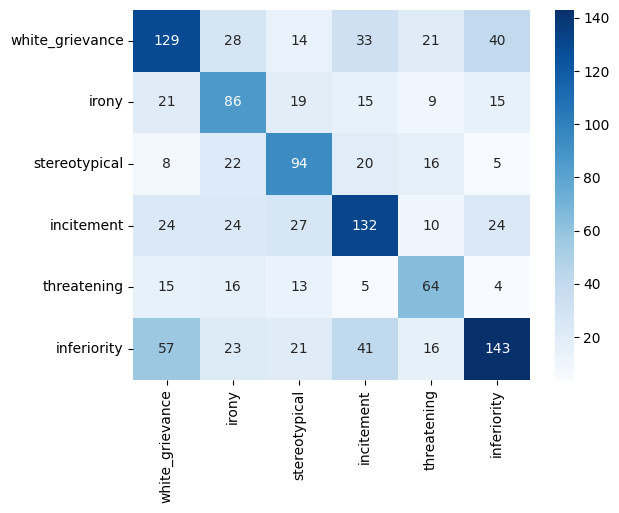

In [ ]:
# Define MLP classifier with 6 output classes
classifier = MLPClassifier(hidden_layer_sizes=(256, 128), max_iter=1000)

# Train the classifier on the encoded text
classifier.fit(X_train, y_train)

# Predict the labels for the encoded text
y_pred = classifier.predict(X_test)

# Calculate accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy} \n")

# Calculate classification report and confusion matrix
target_names = ['class1', 'class2', 'class3', 'class4', 'class5', 'class6']
print(classification_report(y_test, y_pred, target_names=classes))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=classes, yticklabels=classes, fmt='d')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Extract metrics
def calculate_metrics(cm):
    # Number of classes
    num_classes = cm.shape[0]

    # Initialize lists to store metrics for each class
    accuracy = []
    precision=[]
    recall=[]
    f1_score=[]


    # Calculate metrics for each class
    for i in range(num_classes):
        TP = cm[i, i]
        FP = cm[:, i].sum() - TP
        FN = cm[i, :].sum() - TP
        TN = cm.sum() - (TP + FP + FN)

        acc = (TP + TN) / (TP + TN + FP + FN) * 100
        prec = TP / (TP + FP) * 100 if (TP + FP) != 0 else 0
        rec = TP / (TP + FN) * 100 if (TP + FN) != 0 else 0
        f1 = 2 * TP / (2 * TP + FP + FN) * 100 if (2 * TP + FP + FN) != 0 else 0

        accuracy.append(acc)
        precision.append(prec)
        recall.append(rec)
        f1_score.append(f1)

    return accuracy,precision,recall,f1_score

# Calculate metrics
accuracy,precision,recall,f1_score = calculate_metrics(cm)



In [ ]:
accuracy=[a/100 for a in accuracy]
precision = [p / 100 for p in precision]
recall = [r / 100 for r in recall]
f1_score = [f / 100 for f in f1_score]

print("Accuracy (Probabilities):", accuracy)
print("Precision (Probabilities):", precision)
print("Recall (Probabilities):", recall)
print("F1-Score (Probabilities):", f1_score)

Accuracy (Probabilities): [0.7918660287081338, 0.8468899521531099, 0.8684210526315791, 0.8221690590111643, 0.9003189792663477, 0.8038277511961722]
Precision (Probabilities): [0.5078740157480315, 0.4321608040201005, 0.5, 0.5365853658536586, 0.4705882352941176, 0.6190476190476191]
Recall (Probabilities): [0.4867924528301886, 0.5212121212121212, 0.5696969696969697, 0.5477178423236515, 0.5470085470085471, 0.4750830564784053]
F1-Score (Probabilities): [0.49710982658959535, 0.47252747252747246, 0.5325779036827195, 0.5420944558521561, 0.5059288537549407, 0.5375939849624061]


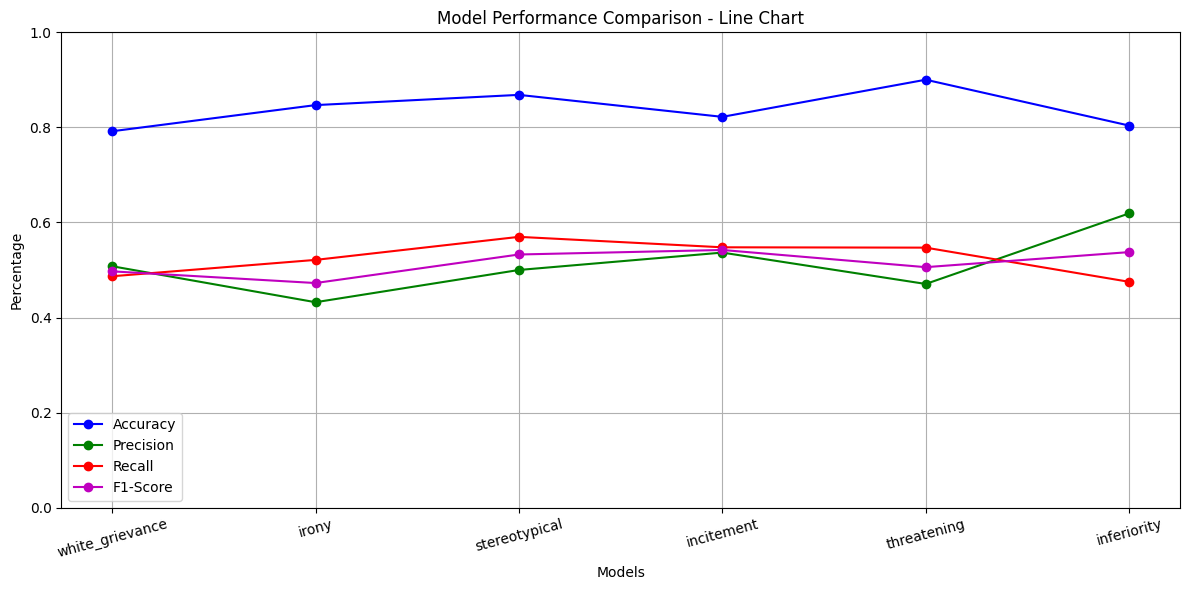

In [ ]:
import matplotlib.pyplot as plt

# Data
models = classes


# Plotting the line chart
plt.figure(figsize=(12, 6))

plt.plot(models, accuracy, marker='o', linestyle='-', color='b', label='Accuracy')
plt.plot(models, precision, marker='o', linestyle='-', color='g', label='Precision')
plt.plot(models, recall, marker='o', linestyle='-', color='r', label='Recall')
plt.plot(models, f1_score, marker='o', linestyle='-', color='m', label='F1-Score')

plt.title('Model Performance Comparison - Line Chart')
plt.xlabel('Models')
plt.ylabel('Percentage')
plt.ylim(0, 1)
plt.grid(True)
plt.legend()

plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


## Binary Classification (baseline + BK)

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
def extract_background_knowledge(tweet_text):
    # Tokenize the tweet text
    tokens = word_tokenize(tweet_text.lower())

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Lemmatize tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Extract background knowledge from tokens
    background_knowledge = set()
    for token in tokens:
        if len(token) > 3:
            background_knowledge.add(token)

    background_knowledge = list(background_knowledge)
    return ' '.join(background_knowledge)

In [ ]:
text_with_BK = [x + extract_background_knowledge(x) for x in X]

# Load pre-trained BERT model
model_name = 'bert-base-nli-mean-tokens'
model = SentenceTransformer(model_name)

# Encode text using pre-trained BERT model
encoded_text = model.encode(text_with_BK)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(encoded_text, y, test_size=0.2, random_state=42)

Accuracy: 0.5127591706539075 

                 precision    recall  f1-score   support

white_grievance       0.52      0.45      0.48       265
          irony       0.47      0.41      0.44       165
  stereotypical       0.50      0.55      0.52       165
     incitement       0.52      0.55      0.53       241
    threatening       0.44      0.52      0.47       117
    inferiority       0.57      0.57      0.57       301

       accuracy                           0.51      1254
      macro avg       0.50      0.51      0.50      1254
   weighted avg       0.51      0.51      0.51      1254



<AxesSubplot:>

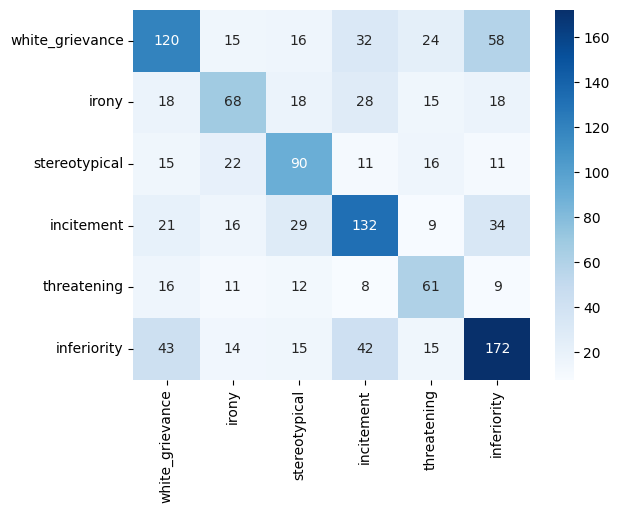

In [ ]:
# Define MLP classifier with 6 output classes
classifier = MLPClassifier(hidden_layer_sizes=(256, 128), max_iter=1000)

# Train the classifier on the encoded text
classifier.fit(X_train, y_train)

# Predict the labels for the encoded text
y_pred = classifier.predict(X_test)

# Calculate accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy} \n")

# Calculate classification report and confusion matrix
target_names = ['class1', 'class2', 'class3', 'class4', 'class5', 'class6']
print(classification_report(y_test, y_pred, target_names=classes))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=classes, yticklabels=classes, fmt='d')